# Шаблон для решения задч DS

## Импорт библиотек

### Общие библиотеки

In [ ]:
# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # линейная алгебра
import pandas as pd # работа с данными
import os # работа с операционной системой
import time

### Бибилиотеки для машинного обучения

In [ ]:
## Стандартные наборы данных и генерация данных под различные задачи
from sklearn.datasets import make_blobs, make_classification, make_regression, make_biclusters
import sklearn.datasets as ds

In [ ]:
## Сбор цепочки операций над данными в единую функцию
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
## С этим еще нужно разобраться, на сколько полезно
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.feature_extraction import DictVectorizer, FeatureHasher

In [ ]:
## Заполнение пропусков в данных
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import MissingIndicator

In [ ]:
## Предварительная обработка признаков и целевого признака
# Нормализация и шкалирование данных
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
# Преобразование исходных признаков в новые формы за счет дискретизации
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, QuantileTransformer
# Преобразование исходных признаков в новые формы за применения нелинейных преобразований
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, PowerTransformer
# Преобразование категориальных признаков
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Преобразование целевых значений (меток, таргетов)
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MultiLabelBinarizer

In [ ]:
## Выбор лучших признаков для модели
from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel,SelectPercentile,VarianceThreshold
from sklearn.feature_selection import chi2,f_classif,f_regression

In [ ]:
## Модели классификации
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# подключение экспериментальных методов
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
## Модели регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor, Lars
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
# подключение экспериментальных методов
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
## Метрики качества моделей
# метрики классификации
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, log_loss, roc_auc_score
# метрики регрессии
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
# сводные отчеты по метрикам
from sklearn.metrics import classification_report, confusion_matrix
# построение кривых для оценки качества модели
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve


In [ ]:
## Методы кластеризации
# сравнение методов кластеризации https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans
from sklearn.cluster import Birch, AffinityPropagation, FeatureAgglomeration, MeanShift, OPTICS
from sklearn.cluster import SpectralBiclustering, SpectralClustering, SpectralCoclustering

In [ ]:
## Декомпозиция данных
from sklearn.decomposition import PCA, NMF, SparsePCA, IncrementalPCA, KernelPCA, MiniBatchSparsePCA
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.decomposition import MiniBatchDictionaryLearning, FactorAnalysis, FastICA, DictionaryLearning, SparseCoder
from sklearn.manifold import TSNE, MDS, SpectralEmbedding

In [ ]:
## Методы выбора лучшей модели и выбора лучших параметров модели
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

## Первый классификатор

#### Задача классификации "Рак молочной железы"

In [ ]:
breast_cancer = ds.load_breast_cancer(return_X_y=False ,as_frame=True)
df = breast_cancer.data
df['target'] = breast_cancer.target
df.sample(3)

In [ ]:
print(breast_cancer.DESCR)

In [ ]:
breast_cancer.feature_names

#### Логистическая регрессия

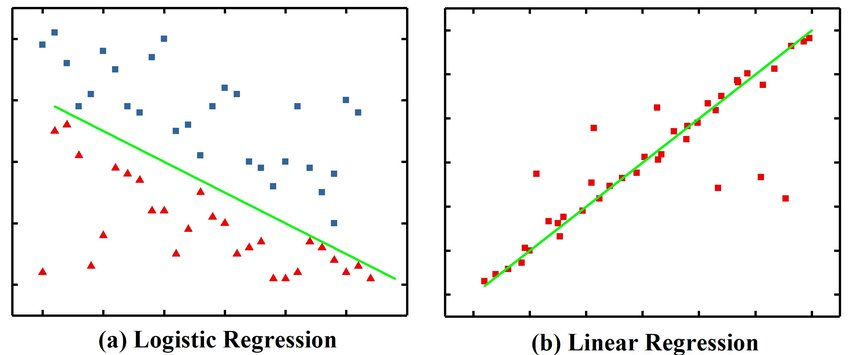

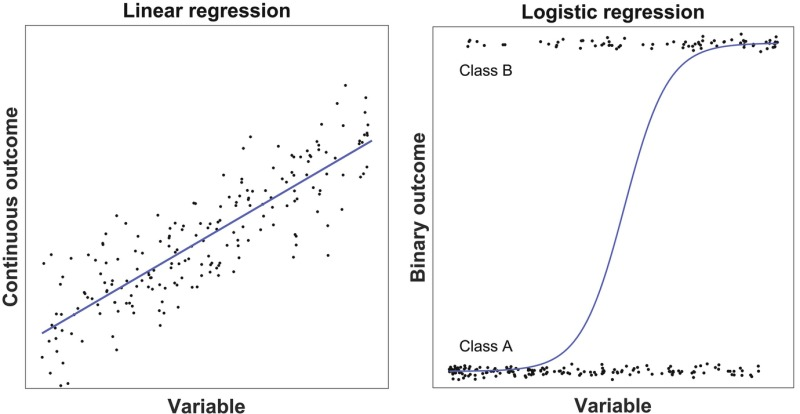

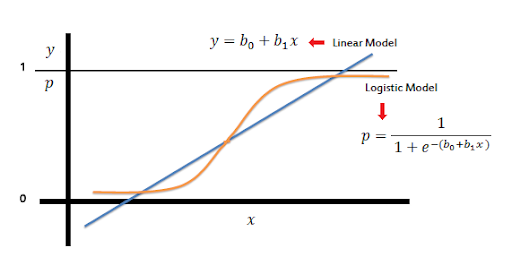

Построим логистическую регрессию без каких либо изменений данных

** penalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ - Используется для указания нормы, используемой в штрафных санкциях. Решатели «newton-cg», «sag» и «lbfgs» поддерживают только штрафы l2. «elasticnet» поддерживается только решателем «saga». Если «нет» (не поддерживается либлинейным решателем), регуляризация не применяется.

** C: float, default=1.0 - Обратная сила регуляризации; должно быть положительное число. Как и в машинах опорных векторов, меньшие значения определяют более сильную регуляризацию.

** solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ - Алгоритм использования в задаче оптимизации
- Для небольших наборов данных «liblinear» - хороший выбор, тогда как «sag» и «saga» быстрее для больших.
- Для задач мультикласса только 'newton-cg', 'sag', 'saga' и 'lbfgs' обрабатывают многочленную потерю; «Liblinear» ограничен схемами «один против остальных».
- "newton-cg", "lbfgs", "sag" и "saga" обрабатывают L2 или без штрафа
- 'liblinear' и 'saga' также обрабатывают штраф L1
- «saga» также поддерживает штраф «elasticnet»
- «liblinear» не поддерживает установку штрафов = «нет»
- Обратите внимание, что быстрая сходимость «sag» и «saga» гарантируется только для функций с примерно одинаковым масштабом. Вы можете предварительно обработать данные с помощью скейлера из sklearn.preprocessing.


In [ ]:
X, y = df.drop('target', axis=1), df['target']

In [ ]:
tsne = TSNE(n_components=2).fit_transform(X)
pca = PCA(n_components=2).fit_transform(X)
mnf = NMF(n_components=2).fit_transform(X)
mds = MDS(n_components=2).fit_transform(X)
spectr = SpectralEmbedding(n_components=2).fit_transform(X)

cluster_colors = {0: 'black', 1: 'red', 2: 'green', 3: 'blue',}#  3: 'pink', 4: 'grey', 5: 'yellow', 6: 'orange', 7: 'brown',
                  #8: 'silver', 9: 'lime', 10:'navy', 11:'salmon', 12:'cyan', 13:'tan', 14:'olive'}
cluster_names = {0:'0',1:'1',2:'2',2:'3',4:'4'}

def make_pic(vectors, df, name_vectors, target='target'):
    x, y = vectors[:,0 ], vectors[:,1]
    plt.scatter(x, y,
                color=df[target].map(cluster_colors), marker='o')
    plt.title(name_vectors)
    plt.grid(True, linestyle='-', color='0.75')
    plt.show()
    
for i, vec in zip([tsne, pca, mnf, mds, spectr], ['TSNE', 'PCA', 'NMF', 'MDS', 'SpectralEmbedding']):
    make_pic(i, df, vec) 

In [ ]:
def clf_validation(clf, X, y, val_mode='cv', cv=5, is_gs=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    if is_gs:
        pass
    if val_mode=='cv':
        scores = cross_val_score(clf, X, y, cv=cv, n_jobs=os.cpu_count())
        print(np.mean(scores))
    elif val_mode=='rep':
        clf.fit(X_train,y_train)
        predict = clf.predict(X_test)
        print(roc_auc_score(y_test, predict))
        print(classification_report(y_test, predict))
    else:
        clf.fit(X_train,y_train)
        plot_confusion_matrix(clf, X_test, y_test)
        plot_roc_curve(clf, X_test, y_test)

In [ ]:
start = time.time()
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf_validation(logreg, X, y)

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
start = time.time()
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf_validation(logreg, X, y, 'rep')

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
start = time.time()
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf_validation(logreg, X, y, 'pic')

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
logreg = LogisticRegression(n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg.fit(X_train, y_train)

In [ ]:
pred = logreg.predict_proba(X_test)[:,1]
pred = [0 if p <= 0.6 else 1 for p in pred]
print(classification_report(y_test, pred))

Эксперименты

In [ ]:
start = time.time()
parameters = {'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0, 1000.0]}
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf = GridSearchCV(logreg, parameters, cv=5)

clf_validation(clf, X, y, 'rep')

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
start = time.time()
parameters = {'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0, 1000.0]}
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf = GridSearchCV(logreg, parameters, cv=5)

clf_validation(clf, X, y, 'cv')

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
start = time.time()
parameters = {'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0, 1000.0]}
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf = GridSearchCV(logreg, parameters, cv=5)

clf_validation(clf, X, y, 'pic')

print("All Process took: {:.2f} seconds".format(time.time() - start))

Обработаем входные признаки

In [ ]:
start = time.time()
parameters = {'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0, 1000.0]}
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf = GridSearchCV(logreg, parameters, cv=5)

clf_validation(clf, X, y, 'pic')

print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
start = time.time()
parameters = {'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0, 1000.0]}
logreg = LogisticRegression(n_jobs=os.cpu_count())
clf = GridSearchCV(logreg, parameters, cv=5)
clf.fit(X_train, y_train)


print("All Process took: {:.2f} seconds".format(time.time() - start))

In [ ]:
logreg = LogisticRegression(**clf.best_params_, n_jobs=os.cpu_count())
logreg.fit(X, y)

In [ ]:
# запись модели на диск и чтение ее обратно
import pickle
with open('logreg.pcl', 'wb') as file:
    pickle.dump(clf, file)
    
with open('logreg.pcl', 'rb') as file:
    clf = pickle.load(file)


In [ ]:
# Чужие функции визуализации, которые нужно сделать универсальными и прикрутить к исследованиям
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), 
                           ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()

def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);
    
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");